## EEG Emotion Prediction  

The data contains *EEG timeseries from subjects who were watching movies*. We will predict the emotional state of the subjects.
 

# Getting Started

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [83]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/emotions.csv')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [85]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


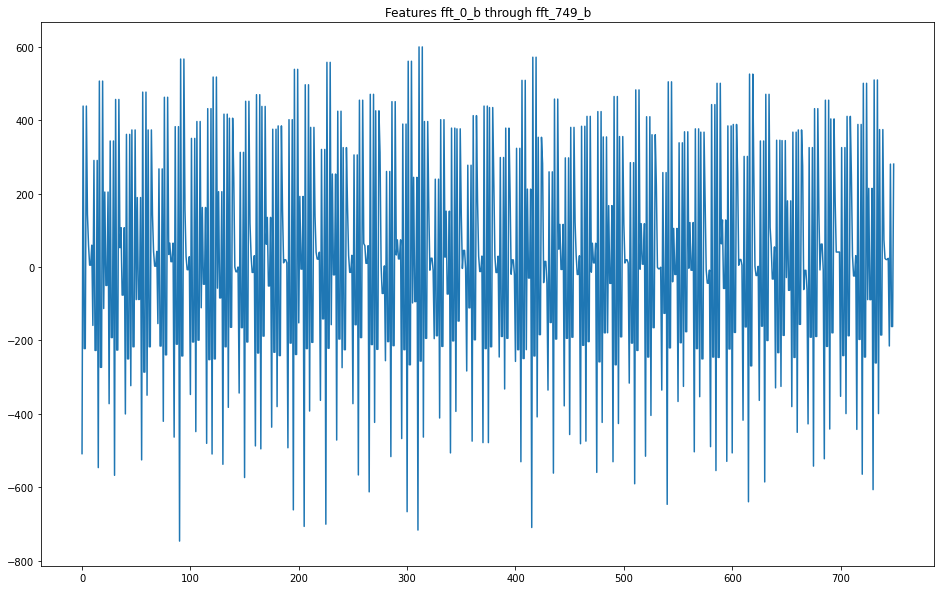

In [86]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64


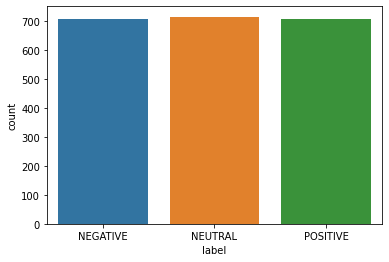

In [87]:
print(data['label'].value_counts())
import seaborn as sns
sns.countplot(x='label', data=data)

In [88]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

# Preprocessing

In [89]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [90]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [91]:
X_train.shape

(1492, 2548)

# Modeling Using ANN

In [92]:

inputsA = tf.keras.Input(shape=(X_train.shape[1],))


l = tf.keras.layers.Dense(64, activation = 'relu')(inputsA)
l = tf.keras.layers.Dense(64, activation = 'relu')(l)

outputsA = tf.keras.layers.Dense(3, activation='softmax')(l)


model_1 = tf.keras.Model(inputs=inputsA, outputs=outputsA)
print(model_1.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense_58 (Dense)            (None, 64)                163136    
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 3)                 195       
                                                                 
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 1s 10ms/step - loss: 14914640936960.0000 - accuracy: 0.5566 - val_loss: 1449113681920.0000 - val_accuracy: 0.7157
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 15567580823552.0000 - accuracy: 0.5440 - val_loss: 2202871791616.0000 - val_accuracy: 0.5719
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 51184626827264.0000 - accuracy: 0.5390 - val_loss: 11019191582720.0000 - val_accuracy: 0.5719
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 6363339030528.0000 - accuracy: 0.5298 - val_loss: 1361920131072.0000 - val_accuracy: 0.6789
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 17615342796800.0000 - accuracy: 0.6429 - val_loss: 487110377472.0000 - val_accuracy: 0.6823
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 2377827745792.0000 - accuracy: 0.6186 - val_loss: 3895415537664.0000 - val_accuracy: 0.6589
Epoch 7/50


# Results for ANN

In [94]:
model_acc_ANN = model_1.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_ANN * 100))

Test Accuracy: 50.469%


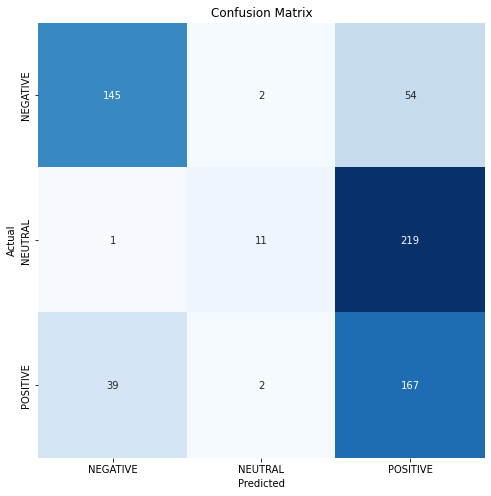

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.72      0.75       201
     NEUTRAL       0.73      0.05      0.09       231
    POSITIVE       0.38      0.80      0.52       208

    accuracy                           0.50       640
   macro avg       0.63      0.52      0.45       640
weighted avg       0.63      0.50      0.44       640



In [95]:
y_predANN = np.array(list(map(lambda x: np.argmax(x), model_1.predict(X_test))))

cmANN = confusion_matrix(y_test, y_predANN)
clr = classification_report(y_test, y_predANN, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cmANN, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Modeling using GRU

In [96]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(64, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 2548, 64)          12864     
                                                                 
 flatten_1 (Flatten)         (None, 163072)            0         
                                                                 
 dense_61 (Dense)            (None, 3)                 489219    
                                                                 
Total params: 502,083
Trainable params: 502,083
Non-trainable params: 0
_____________________________________________________

In [97]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 5s 97ms/step - loss: 18.5652 - accuracy: 0.6723 - val_loss: 14.5816 - val_accuracy: 0.6488
Epoch 2/50
38/38 [==============================] - 3s 76ms/step - loss: 6.2627 - accuracy: 0.8391 - val_loss: 1.7029 - val_accuracy: 0.9130
Epoch 3/50
38/38 [==============================] - 3s 90ms/step - loss: 0.5868 - accuracy: 0.9531 - val_loss: 1.3478 - val_accuracy: 0.9097
Epoch 4/50
38/38 [==============================] - 3s 80ms/step - loss: 0.4993 - accuracy: 0.9556 - val_loss: 0.4801 - val_accuracy: 0.9197
Epoch 5/50
38/38 [==============================] - 3s 78ms/step - loss: 1.0649 - accuracy: 0.9422 - val_loss: 1.7931 - val_accuracy: 0.9097
Epoch 6/50
38/38 [==============================] - 3s 75ms/step - loss: 0.5812 - accuracy: 0.9573 - val_loss: 0.7124 - val_accuracy: 0.9532
Epoch 7/50
38/38 [==============================] - 3s 76ms/step - loss: 0.3726 - accuracy: 0.9723 - val_loss: 1.1522 - val_accuracy: 0.9298
Epoch 8/50


# Results

In [98]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 92.656%


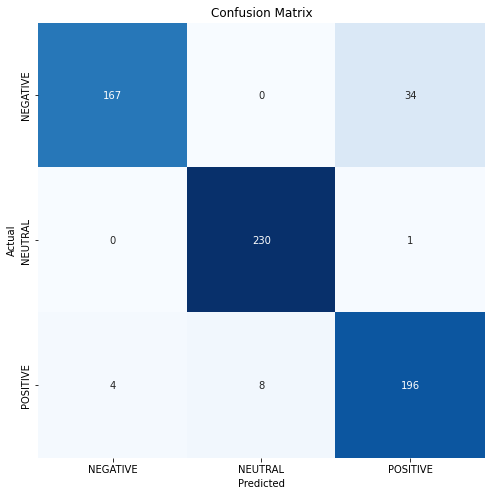

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.98      0.83      0.90       201
     NEUTRAL       0.97      1.00      0.98       231
    POSITIVE       0.85      0.94      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.92      0.92       640
weighted avg       0.93      0.93      0.93       640



In [99]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Modeling Using LSTM

In [100]:
X_train = np.array(X_train)
X_test = np.array(X_test)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD

x_train = np.reshape(X_train, (X_train.shape[0],1,2548))
x_test = np.reshape(X_test, (X_test.shape[0],1,2548))

In [118]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(256, input_shape=(1,2548),activation="sigmoid",return_sequences=True))
#model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(128,activation="sigmoid"))
#model_LSTM.add(Dropout(0.2))
#model_LSTM.add(LSTM(100,return_sequences=True))
#model_LSTM.add(Dropout(0.2))
# model_LSTM.add(LSTM(16,activation="sigmoid"))
# model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(64, activation='sigmoid'))
model_LSTM.add(Dense(3, activation='sigmoid'))
model_LSTM.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 1, 256)            2872320   
                                                                 
 lstm_61 (LSTM)              (None, 128)               197120    
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dense_80 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3,077,891
Trainable params: 3,077,891
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_LSTM.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_LSTM.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True)])


Epoch 1/100
38/38 [==============================] - 3s 20ms/step - loss: 0.9856 - accuracy: 0.5851 - val_loss: 0.7830 - val_accuracy: 0.6455
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 0.7199 - accuracy: 0.6798 - val_loss: 0.6611 - val_accuracy: 0.6555
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.6643 - accuracy: 0.6840 - val_loss: 0.6370 - val_accuracy: 0.6656
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 0.6462 - accuracy: 0.6949 - val_loss: 0.6215 - val_accuracy: 0.6923
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 0.6347 - accuracy: 0.7058 - val_loss: 0.6083 - val_accuracy: 0.7124
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.6235 - accuracy: 0.7091 - val_loss: 0.5918 - val_accuracy: 0.7224
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 0.6106 - accuracy: 0.7167 - val_loss: 0.5868 - val_accuracy: 0.7157
Epoch 

In [120]:
model_acc_LSTM = model_LSTM.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_LSTM * 100))

Test Accuracy: 74.844%


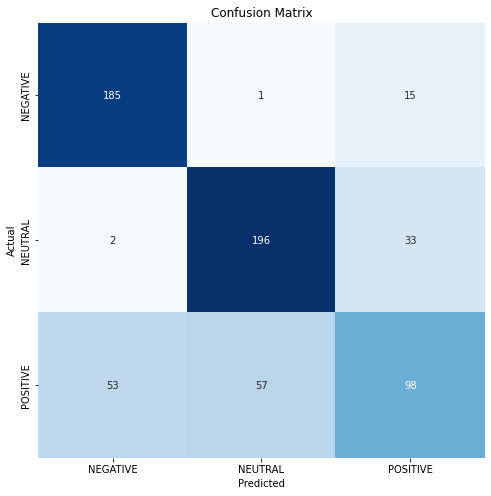

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.77      0.92      0.84       201
     NEUTRAL       0.77      0.85      0.81       231
    POSITIVE       0.67      0.47      0.55       208

    accuracy                           0.75       640
   macro avg       0.74      0.75      0.73       640
weighted avg       0.74      0.75      0.74       640



In [121]:
y_pred_LSTM = np.array(list(map(lambda x: np.argmax(x), model_LSTM.predict(x_test))))

cm_LSTM = confusion_matrix(y_test, y_pred_LSTM)
clr = classification_report(y_test, y_pred_LSTM, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_LSTM, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)